# Table of Contents
 <p><div class="lev1 toc-item"><a href="#detrend-(just-in-case)" data-toc-modified-id="detrend-(just-in-case)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>detrend (just in case)</a></div><div class="lev1 toc-item"><a href="#create-a-sparse-version" data-toc-modified-id="create-a-sparse-version-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>create a sparse version</a></div>

In [158]:
__author__ = "federica b bianco - NYU 2017"
'''from a Kepler lcvs array creatse a sparse npy array by random selection'''

'from a Kepler lcvs array creatse a sparse npy array by random selection'

In [91]:
import numpy as np
import pylab as pl
import sklearn as skl

%pylab inline
pl.rcParams['figure.figsize'] = (20,20)
pl.rcParams['font.size'] = 20


Populating the interactive namespace from numpy and matplotlib


In [66]:
lcvsKep = np.load("data/KeplerSampleWErr.npy")

## detrend (just in case)

In [80]:
lcvsKep[:,1].mean()

1.0

In [81]:
lcvsKep[:,1,:] /= lcvsKep[:,1].mean(axis = 0)

## create a sparse version

In [84]:
lcvsKepSparse = np.zeros((lcvsKep.shape[0], lcvsKep.shape[1], 50))

In [153]:
np.random.seed(666)

In [154]:
lcvsKepSparse = np.array([lcvsKep[i, :, np.sort(choice)].T for i,choice in enumerate(np.random.randint(0, 100, lcvsKep.shape[0]*50).reshape(lcvsKep.shape[0],50))])

In [155]:
lcvsKepSparse.shape

(2500, 3, 50)

<Container object of 3 artists>

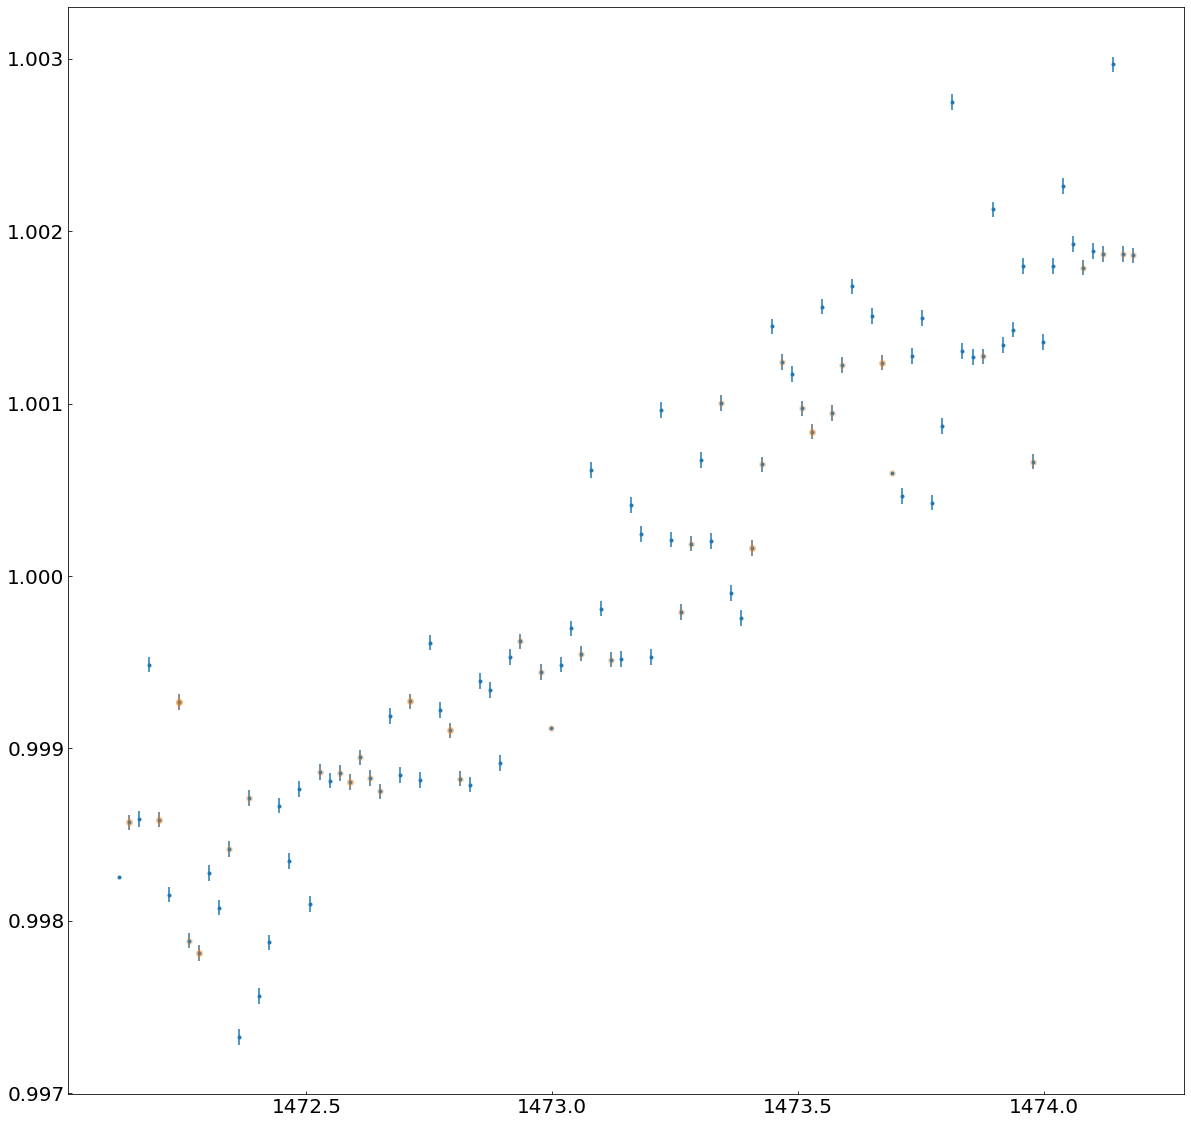

In [156]:
pl.errorbar(lcvsKep[50,0,:], lcvsKep[50,1,:], yerr=lcvsKep[50,2,:]*.00001, fmt='.')

pl.errorbar(lcvsKepSparse[50,0,:], lcvsKepSparse[50,1,:], yerr=lcvsKepSparse[50,2,:]*.00001, fmt='o', alpha=0.2)



In [157]:
np.save("data/KeplerSampleWErrSparse.npy", lcvsKepSparse)